## LOGISTIC REGRESSION AND VISUALIZATION ## 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### **Load Data (Watson Data & Sales Data)**

In [4]:
df = pd.read_csv("E:/DSM 1/DATA SET/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

sales= pd.read_csv("E:/DSM 1/DATA SET/sales.csv")


In [6]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
sales.head()    

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###**1. Add Engaged Column**

In [8]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


### **2. Calculate Engagement Rate By Sales Channel**

In [9]:
engagement_by_sales_channel_df = df.groupby(['Sales Channel', 'Response']).count()['Customer'].unstack().fillna(0)
engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


### **3.Visualize Engaged Rate according to Sales Channel through Bar/Pie Chart**

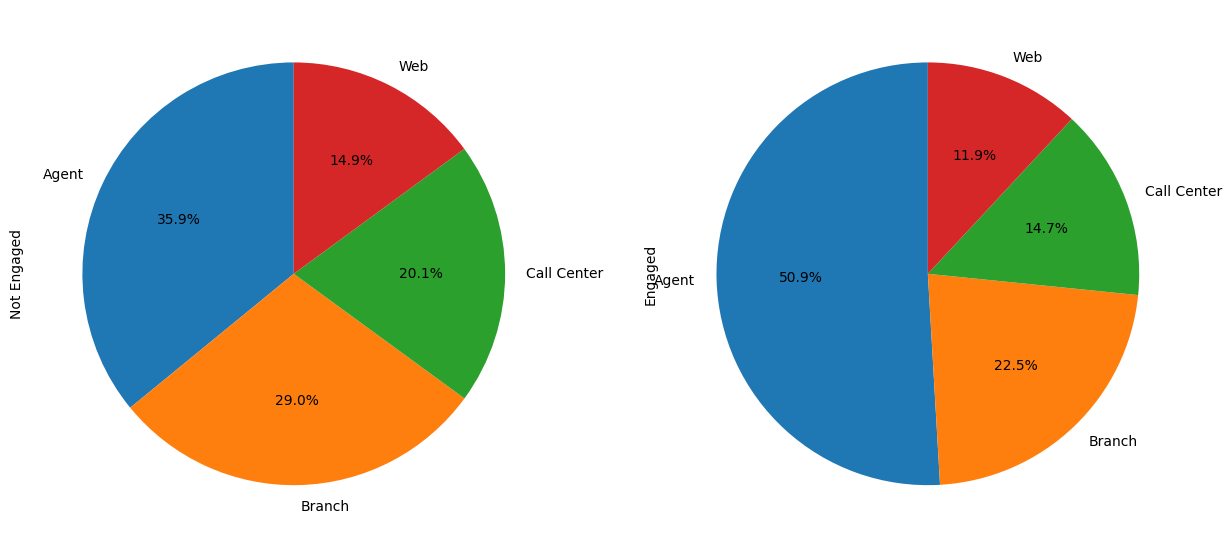

In [10]:
engagement_by_sales_channel_df.plot(
    kind='pie',
    subplots=True,
    startangle = 90,
    figsize=(15, 7),
    autopct='%1.1f%%',
    legend=False
)
plt.show()

### **4 .Diaply the distribution of  data with  the variable "Income"**

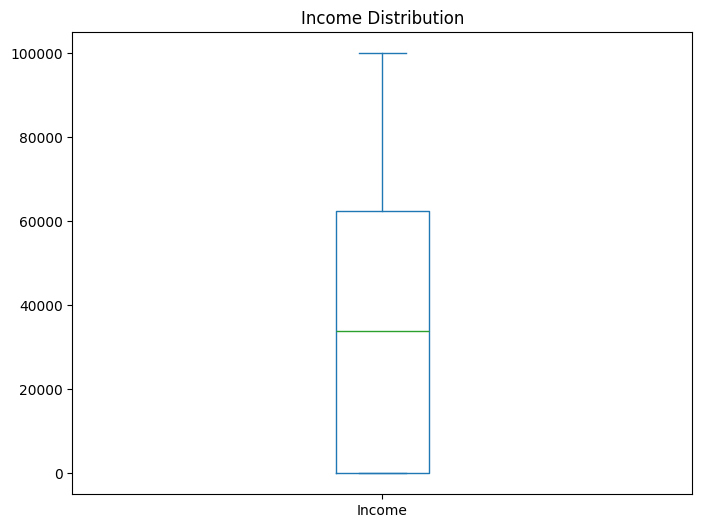

In [11]:
ax = df[['Income']].plot(kind='box', title='Income Distribution', figsize=(8, 6))
plt.show()

### **5. Build a Logistic Regression Model by including all (Continuous and Categorical Variables)**

In [12]:
# 1. Define your features and target
categorical_vars = ['Sales Channel', 'Vehicle Size', 'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Policy', 'Policy Type', 'State', 'Vehicle Class']
continuous_vars = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

# Create binary target variable in the 'vignesh' dataframe
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

# 2. Encode categorical variables and define X and y
df_encoded = pd.get_dummies(df[categorical_vars])
X = pd.concat([df[continuous_vars], df_encoded], axis=1)
y = df['Engaged']

# 3. Handle missing values (The part that caused the NameError)
X = X.dropna()
y = y[X.index]

# 4. Convert to float for compatibility
X = X.astype(float)
y = y.astype(float)

# 5. Fit the model
import statsmodels.api as sm
logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()
print(result.summary())

         Current function value: 0.368112
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9092
Method:                           MLE   Df Model:                           41
Date:                Sat, 20 Dec 2025   Pseudo R-squ.:                  0.1038
Time:                        09:39:43   Log-Likelihood:                -3362.3
converged:                      False   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                5.365e-137
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.3401      1e+06   -3.4e-07      1.000   -1.96e+06    1.96e+06
Custo

c:\Users\ykuma\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### **6. Perform basic Analysis using Sales.csv**

In [13]:
print(sales.head())

   Year    Product line      Product type                      Product  \
0  2004  Golf Equipment  Golf Accessories  Course Pro Golf and Tee Set   
1  2004  Golf Equipment  Golf Accessories  Course Pro Golf and Tee Set   
2  2005  Golf Equipment  Golf Accessories  Course Pro Golf and Tee Set   
3  2005  Golf Equipment  Golf Accessories  Course Pro Golf and Tee Set   
4  2006  Golf Equipment  Golf Accessories  Course Pro Golf and Tee Set   

  Order method type Retailer country   Revenue  Planned revenue  Product cost  \
0       Sales visit    United States   5819.70          6586.16        1733.2   
1       Sales visit   United Kingdom       NaN              NaN           NaN   
2       Sales visit    United States  10904.28         11363.52        2990.4   
3       Sales visit   United Kingdom  27987.84         28855.68        7593.6   
4       Sales visit    United States       NaN              NaN           NaN   

   Quantity  Unit cost  Unit price  Gross profit  Unit sale price  


In [14]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17823 entries, 0 to 17822
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               17823 non-null  int64  
 1   Product line       17823 non-null  object 
 2   Product type       17823 non-null  object 
 3   Product            17823 non-null  object 
 4   Order method type  17823 non-null  object 
 5   Retailer country   17823 non-null  object 
 6   Revenue            6045 non-null   float64
 7   Planned revenue    6045 non-null   float64
 8   Product cost       6045 non-null   float64
 9   Quantity           5860 non-null   float64
 10  Unit cost          6045 non-null   float64
 11  Unit price         6045 non-null   float64
 12  Gross profit       6045 non-null   float64
 13  Unit sale price    6045 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 1.9+ MB
None


In [15]:
print(sales.describe())

               Year       Revenue  Planned revenue  Product cost  \
count  17823.000000  6.045000e+03     6.045000e+03  6.045000e+03   
mean    2005.164955  1.038455e+05     1.058923e+05  5.701932e+04   
std        0.956260  1.836042e+05     1.881274e+05  1.117846e+05   
min     2004.000000  0.000000e+00     0.000000e+00  3.360000e+01   
25%     2004.000000  1.364924e+04     1.383736e+04  5.759760e+03   
50%     2005.000000  4.154119e+04     4.189571e+04  1.906720e+04   
75%     2006.000000  1.120026e+05     1.144758e+05  5.796000e+04   
max     2007.000000  3.644349e+06     3.477910e+06  2.061750e+06   

            Quantity    Unit cost   Unit price  Gross profit  Unit sale price  
count    5860.000000  6045.000000  6045.000000  6.045000e+03      6045.000000  
mean     4691.273549    58.882618    48.900855  4.336203e+04        44.795072  
std      8950.955313   348.369401    62.814500  7.185831e+04        58.399255  
min         5.000000     0.850000     3.660000 -1.336560e+04       

### **7. Calculate country wise Revenue, Planned revenue, Product cost, Quantity, Gross profit using "groupby " function**

In [16]:
country_stats = sales.groupby('Retailer country')[['Revenue',
                                   'Planned revenue',
                                   'Product cost',
                                   'Quantity',
                                   'Gross profit']].sum()
country_stats

,Revenue,Planned revenue,Product cost,Quantity,Gross profit
Retailer country,,,,,
Australia,1.526422e+07,1.552855e+07,8367046.10,649467.0,6384806.59
Austria,1.631419e+07,1.663918e+07,8923176.61,719084.0,6871597.34
Belgium,1.415299e+07,1.434713e+07,7695759.79,622150.0,5964513.37
Brazil,1.686686e+07,1.718625e+07,9210809.34,744353.0,7092849.29
Canada,3.918371e+07,3.975547e+07,21435997.54,1701123.0,16670505.63
China,4.350234e+07,4.432347e+07,23925152.71,1935454.0,18003637.37
Denmark,8.455457e+06,8.657223e+06,4695594.80,368479.0,3496915.24
Finland,2.714528e+07,2.768705e+07,14879340.33,1207265.0,11335187.27
France,3.595367e+07,3.640336e+07,19646425.37,1620252.0,14968952.89


###  **8. Calculate year wise total Revenue, Planned revenue ,Product cost, Quantity, Unit cost, Unit price, Gross profit, Unit sale priceunction**

In [17]:
year_stats = sales.groupby('Year')[['Revenue', 'Planned revenue', 'Product cost', 'Quantity', 'Unit cost', 'Unit price', 'Gross profit', 'Unit sale price']].sum()
year_stats

,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Year,,,,,,,,
2004,1.528977e+08,1.567331e+08,8.538058e+07,7318558.0,97750.174438,92781.46,62482134.57,84841.786496
2005,1.908502e+08,1.947044e+08,1.029861e+08,8453776.0,113381.098628,103147.42,81126260.32,93071.003707
2006,2.228721e+08,2.270020e+08,1.209524e+08,8786835.0,134772.241249,82126.84,95563977.64,76786.074337
2007,6.112591e+07,6.167953e+07,3.536268e+07,2931694.0,10041.912620,17549.95,22951118.87,16087.343791
